In [1]:
import itertools

n_rand = [0, 10, 20]
n_save = [1, 3, 5]
P_mut = [0, 0.1, 0.3]
n_init = [10, 50, 100, 500, 1000]

# Générer toutes les combinaisons de n_rand et n_save
combinations = list(itertools.product(n_rand, n_save))

# Ajouter les valeurs de P_mut et n_init à chaque combinaison de n_rand et n_save
final_combinations = []
for combo in combinations:
    for pmut in P_mut:
            final_combinations.append((*combo, pmut))

# Afficher les combinaisons finales
for combo in final_combinations:
    print(combo)
len(final_combinations)


(0, 1, 0)
(0, 1, 0.1)
(0, 1, 0.3)
(0, 3, 0)
(0, 3, 0.1)
(0, 3, 0.3)
(0, 5, 0)
(0, 5, 0.1)
(0, 5, 0.3)
(10, 1, 0)
(10, 1, 0.1)
(10, 1, 0.3)
(10, 3, 0)
(10, 3, 0.1)
(10, 3, 0.3)
(10, 5, 0)
(10, 5, 0.1)
(10, 5, 0.3)
(20, 1, 0)
(20, 1, 0.1)
(20, 1, 0.3)
(20, 3, 0)
(20, 3, 0.1)
(20, 3, 0.3)
(20, 5, 0)
(20, 5, 0.1)
(20, 5, 0.3)


27

In [14]:
from collections import deque
import numpy as np

def generate_paths(matrix, start_state, path_length, state_names):
    num_states = matrix.shape[0]
    
    # Trouver l'indice correspondant à l'état de départ dans la liste des noms d'états
    start_index = state_names.index(start_state) if start_state in state_names else -1
    
    # Initialiser la queue avec le chemin de départ, si l'indice est valide
    if start_index == -1:
        return []  # Retourner une liste vide si l'état de départ n'est pas trouvé
    queue = deque([([start_state], 0)])
    
    paths = []
    
    # Processus BFS pour trouver les chemins
    while queue:
        current_path, current_length = queue.popleft()
        current_state = current_path[-1]
        current_index = state_names.index(current_state)  # Obtenir l'indice actuel du dernier état dans le chemin
        
        if current_length == path_length:
            paths.append(current_path)
            continue
        
        for next_state in range(num_states):
            if matrix[current_index, next_state] > 0:
                queue.append((current_path + [state_names[next_state]], current_length + 1))
    
    return paths

def calcul_nb(chemin):
    n = 0
    Tab = [5, 10, 15, 20]
    for x in chemin:
        if x in Tab:
            n += 1
    return n

# États renommés, remplir avec des indices si non spécifiés
state_names = [i for i in range(10)]  # Indices par défaut de 0 à 9
state_names[9] = 5  # Renommer l'état 9 en 5
state_names[3] = 20
state_names[5] = 10
state_names[8] = 15

# Matrice de transition A
A = np.zeros((10, 10))
A[0, 1] = 1
A[1, 2] = 1
A[2, 3] = 1
A[3, 0] = 1
A[3, 4] = 1
A[3, 6] = 1
A[3, 9] = 1
A[4, 5] = 1
A[5, 4] = 1
A[5, 0] = 1
A[5, 6] = 1
A[5, 9] = 1
A[6, 7] = 1
A[7, 8] = 1
A[8, 0] = 1
A[8, 4] = 1
A[8, 6] = 1
A[8, 9] = 1
A[9, 0] = 1
A[9, 4] = 1
A[9, 6] = 1
A[9, 9] = 1

start_state = 5  # Début à l'état renommé '5', qui est maintenant l'indice 9
path_length = 16  # Longueur de chemin demandée

# Générer les chemins à partir des paramètres donnés
path_5 = generate_paths(A, 5, path_length, state_names)
path_0_10= generate_paths(A, 4, path_length, state_names)
path_0_15 = generate_paths(A, 6, path_length, state_names)
path_0_20 = generate_paths(A, 0, path_length, state_names)
# Calculer et afficher les statistiques des chemins
# Calcul des combinaisons totales pour chaque path
C1 = sum((3*5*21)**calcul_nb(chemin[:16]) for chemin in path_5)
C2 = sum((3*5*21)**calcul_nb(chemin[:16]) for chemin in path_0_10)
C3 = sum((3*5*21)**calcul_nb(chemin[:16]) for chemin in path_0_15)
C4 = sum((3*5*21)**calcul_nb(chemin[:16]) for chemin in path_0_20)
total = C1 + C2 + C3 + C4

# Affichage du résultat total en notation scientifique
print('Le nombre de combinaison pour theta est', format(total, '.2e'))
import numpy as np
# Calcul et affichage du log2 du résultat total
# Conversion de total en float pour éviter les erreurs de type lors du calcul du logarithme
total_float = float(total)
log2_total = np.log2(total_float)
print("Le log2 du total des combinaisons est", log2_total)
print('le nombre des chemins possibles pour 5 est :',len(path_5))
print('le nombre des chemins possibles pour 0_10 est ',len(path_0_10))
print('le nombre des chemins possibles pour 0_15 est :' ,len(path_0_15))
print('le nombre des chemins possibles pour 0_20 est :',len(path_0_20))
for chemin in path_5:
    print(calcul_nb(chemin[:16]))
    print(chemin[:16])

Le nombre de combinaison pour theta est 3.95e+40
Le log2 du total des combinaisons est 134.85934651843465
le nombre des chemins possibles pour 5 est : 66526
le nombre des chemins possibles pour 0_10 est  34513
le nombre des chemins possibles pour 0_15 est : 17905
le nombre des chemins possibles pour 0_20 est : 9289
4
[5, 0, 1, 2, 20, 0, 1, 2, 20, 0, 1, 2, 20, 0, 1, 2]
5
[5, 0, 1, 2, 20, 0, 1, 2, 20, 0, 1, 2, 20, 4, 10, 0]
5
[5, 0, 1, 2, 20, 0, 1, 2, 20, 0, 1, 2, 20, 4, 10, 4]
5
[5, 0, 1, 2, 20, 0, 1, 2, 20, 0, 1, 2, 20, 4, 10, 6]
6
[5, 0, 1, 2, 20, 0, 1, 2, 20, 0, 1, 2, 20, 4, 10, 5]
6
[5, 0, 1, 2, 20, 0, 1, 2, 20, 0, 1, 2, 20, 4, 10, 5]
6
[5, 0, 1, 2, 20, 0, 1, 2, 20, 0, 1, 2, 20, 4, 10, 5]
6
[5, 0, 1, 2, 20, 0, 1, 2, 20, 0, 1, 2, 20, 4, 10, 5]
5
[5, 0, 1, 2, 20, 0, 1, 2, 20, 0, 1, 2, 20, 6, 7, 15]
5
[5, 0, 1, 2, 20, 0, 1, 2, 20, 0, 1, 2, 20, 6, 7, 15]
5
[5, 0, 1, 2, 20, 0, 1, 2, 20, 0, 1, 2, 20, 6, 7, 15]
5
[5, 0, 1, 2, 20, 0, 1, 2, 20, 0, 1, 2, 20, 6, 7, 15]
5
[5, 0, 1, 2, 20, 0, 1,

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


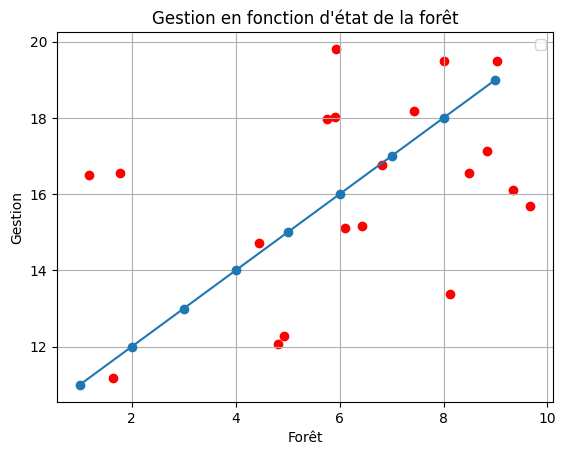

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Données linéaires
foret = list(range(1, 10))
gestion = list(range(11, 20))

# Valeurs aléatoires pour la courbe de dispersion
np.random.seed(0)  # Pour la reproductibilité
foret_random = np.random.uniform(1, 10, 20)
gestion_random = np.random.uniform(11, 20, 20)

# Tracé des courbes
plt.plot(foret, gestion, marker='o')
plt.scatter(foret_random, gestion_random, color='r')

plt.xlabel("Forêt")
plt.ylabel("Gestion")
plt.title("Gestion en fonction d'état de la forêt")
plt.grid(True)
plt.legend()
plt.show()


In [22]:
import pandas as pd

# Les données sous forme de liste de tuples
data = [
    (0, 1, 1.5843973909509406), (0, 3, 1.5077883965552614), (0, 4, 1.6205622695065924),
    (0, 5, 1.5834090761959765), (0, 6, 1.6450747818317482), (0, 10, 1.6961184232509399),
    (1, 11, 1.617422277834223), (1, 12, 1.724321059135174), (1, 13, 1.6186240436812185),
    (1, 14, 1.572508061429647), (1, 20, 1.7341446148945654), (2, 28, 1.6202091964668226),
    (2, 29, 1.7554780666975942), (2, 11, 1.617422277834223), (2, 13, 1.6186240436812185),
    (2, 38, 1.745688106370248), (3, 13, 1.6186240436812185), (3, 38, 1.745688106370248),
    (3, 43, 1.6569728186914916), (3, 44, 1.6227662287119613), (3, 53, 1.7736538037391296),
    (4, 58, 1.6647788384982016), (4, 59, 1.745688106370248), (4, 60, 1.5843973909509406),
    (4, 61, 1.6642786326187642), (4, 70, 1.8101002345604909), (5, 75, 1.6101128049337652),
    (5, 76, 1.7664425002072877), (5, 58, 1.6647788384982016), (5, 60, 1.5843973909509406),
    (5, 85, 1.8372094006755832), (6, 60, 1.5843973909509406), (6, 85, 1.8372094006755832),
    (6, 90, 1.5834090761959765), (6, 91, 1.6433889089549567), (6, 92, 1.8621216362805004),
    (7, 105, 1.573881488811641), (7, 106, 1.8372094006755832), (7, 107, 1.6186240436812185),
    (7, 108, 1.572508061429647), (7, 117, 1.8726935267450973), (8, 123, 1.588053984060922),
    (8, 124, 1.8501318230830675), (8, 105, 1.573881488811641), (8, 107, 1.6186240436812185),
    (8, 137, 1.8727057469744774), (9, 107, 1.6186240436812185), (9, 137, 1.8727057469744774),
    (9, 138, 1.6054603764618574), (9, 139, 1.5910136088845557), (9, 152, 1.8727132377186273),
    (10, 153, 1.5931611321319126), (10, 154, 1.8621216362805004), (10, 155, 1.5843973909509406),
    (10, 156, 1.6124398018244235), (10, 169, 1.8727182624835397), (11, 156, 1.6124398018244235),
    (11, 169, 1.8727182624835397), (11, 153, 1.5931611321319126), (11, 155, 1.5843973909509406),
    (11, 182, 1.8727201073354445), (12, 155, 1.5843973909509406), (12, 182, 1.8727201073354445),
    (12, 183, 1.6006748189594893), (12, 184, 1.5758874401237157), (13, 198, 1.6186240436812185),
    (13, 199, 1.588053984060922), (13, 200, 1.5758874401237157), (13, 201, 1.8727132377186273),
    (13, 182, 1.8727201073354445), (14, 198, 1.6186240436812185), (14, 201, 1.8727132377186273),
    (14, 182, 1.8727201073354445), (14, 200, 1.5758874401237157), (15, 198, 1.6186240436812185),
    (15, 182, 1.8727201073354445), (15, 228, 1.5758874401237157), (15, 229, 1.8727201073354445),
    (16, 198, 1.6186240436812185), (16, 228, 1.5758874401237157), (16, 229, 1.8727201073354445),
    (16, 182, 1.8727201073354445)
]

# Créer un DataFrame à partir des données
df = pd.DataFrame(data, columns=['Generation', 'Individual', 'Fitness'])

# Calculer la variance de la fitness
fitness_variance = df['Fitness'].var()

# Afficher la variance
print(f"La variance de la fitness est : {fitness_variance}")


La variance de la fitness est : 0.014164920015832496


In [ ]:
#pour n=10/50 => tester : n_rand,n_save,P_mut
(0, 1, 0)
(0, 1, 0.1)
(0, 1, 0.3)
(0, 3, 0)
(0, 3, 0.1)
(0, 3, 0.3)
(0, 5, 0)
(0, 5, 0.1)
(0, 5, 0.3)
(10, 1, 0)
(10, 1, 0.1)
(10, 1, 0.3)
(10, 3, 0)
(10, 3, 0.1)
(10, 3, 0.3)
(10, 5, 0)
(10, 5, 0.1)
(10, 5, 0.3)
(20, 1, 0)
(20, 1, 0.1)
(20, 1, 0.3)
(20, 3, 0)
(20, 3, 0.1)
(20, 3, 0.3)
(20, 5, 0)
(20, 5, 0.1)
(20, 5, 0.3)"""


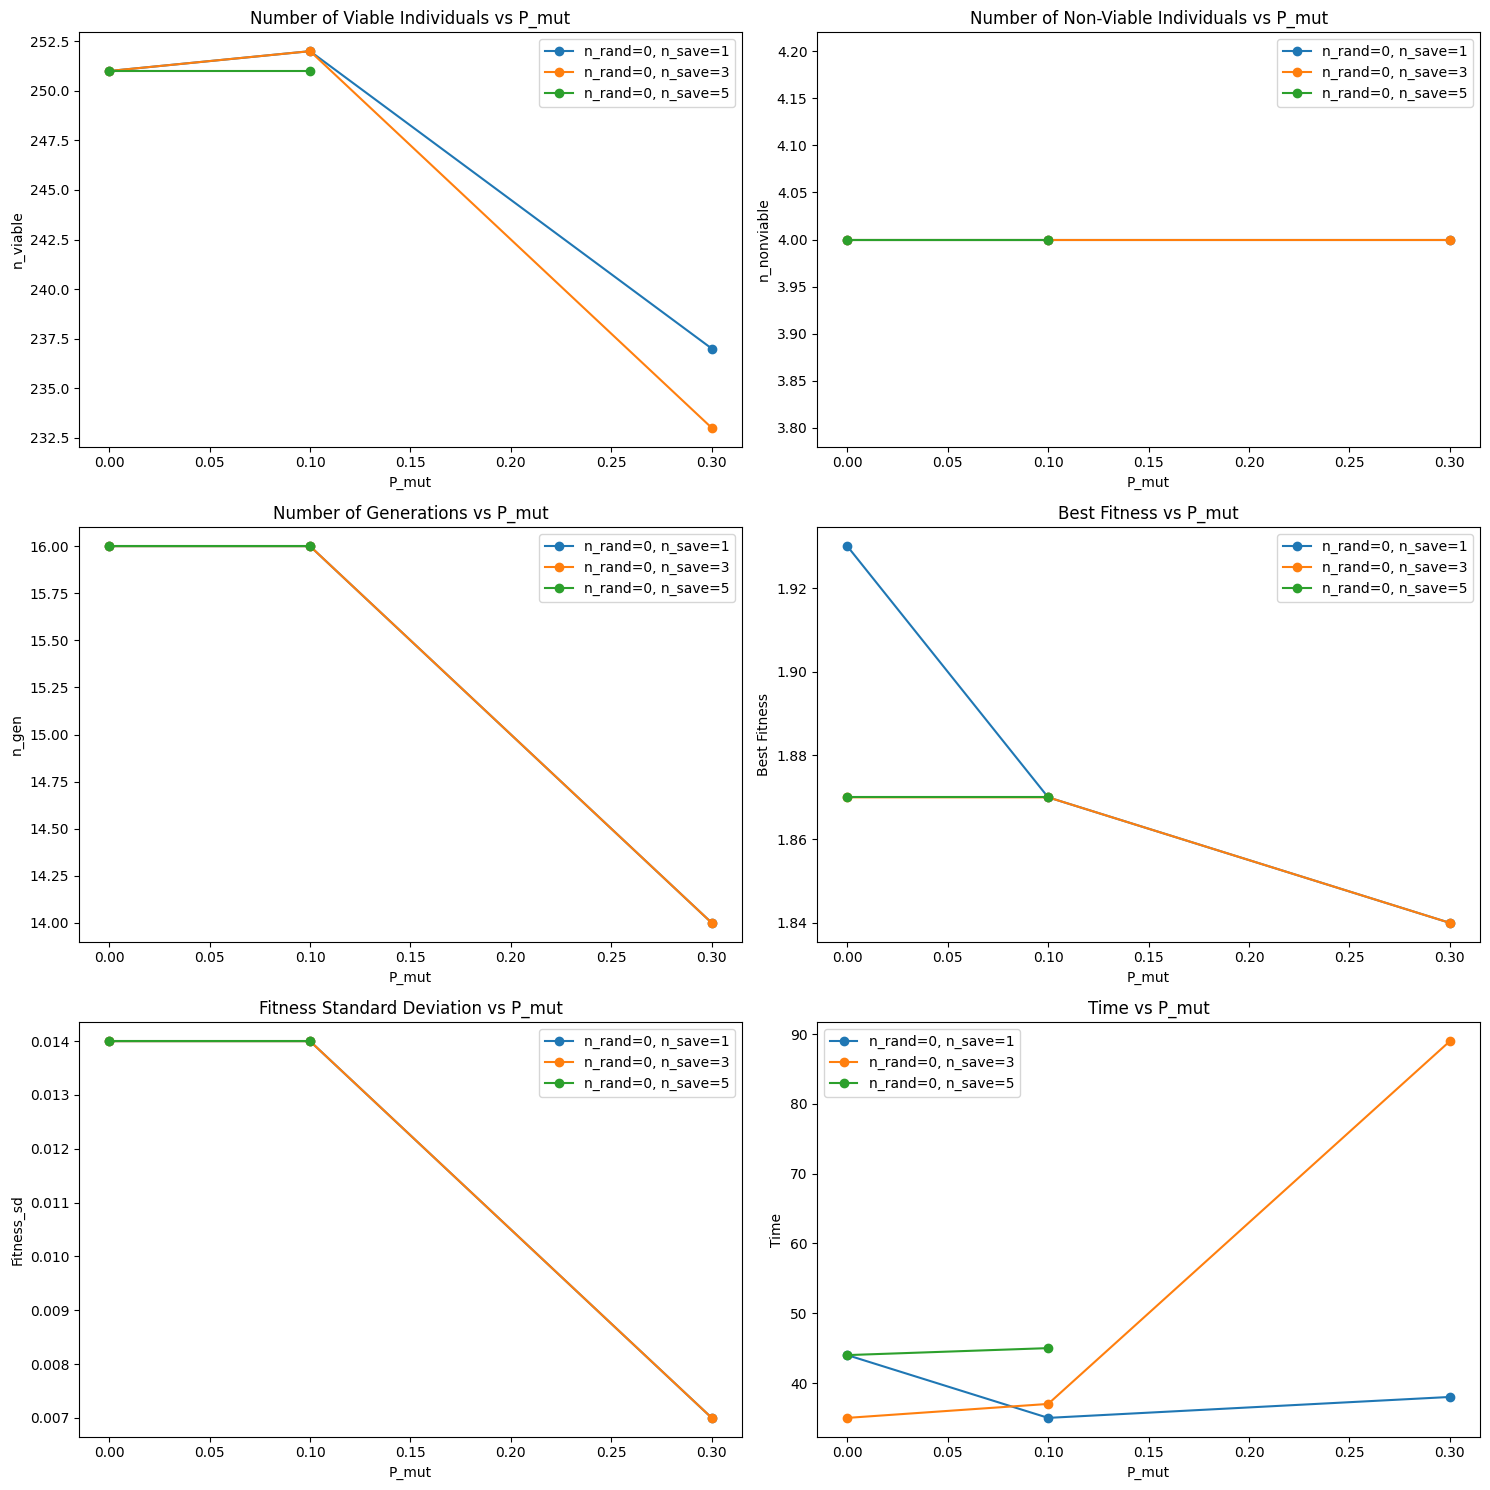

In [38]:
import matplotlib.pyplot as plt

# Données organisées pour différentes combinaisons n_rand,n_save,P_mut
data = {
    (0, 1): {
        'P_mut': [0, 0.1, 0.3],
        'n_viable': [251, 252, 237],
        'n_nonviable': [4, 4, 4],
        'n_gen': [16, 16, 14],
        'best_fitness': [1.93, 1.87, 1.84],
        'Fitness_sd': [0.014, 0.014, 0.007],
        'time': [44, 35, 38]
    },
    (0, 3): {
        'P_mut': [0,0.1,0.3],
        'n_viable': [251,252,233],
        'n_nonviable': [4,4,4],
        'n_gen': [16,16,14],
        'best_fitness': [1.87,1.87,1.84],
        'Fitness_sd': [0.014,0.014,0.007],
        'time': [35,37,89]
    },
    (0, 5): {
        'P_mut': [0,0.1],
        'n_viable': [251,251],
        'n_nonviable': [4,4],
        'n_gen': [16,16],
        'best_fitness': [1.87,1.87],
        'Fitness_sd': [0.014,0.014],
        'time': [44,45]
    }
    
}

# Configurer les sous-graphiques
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Créer une fonction pour tracer chaque graphique
def plot_metric(ax, data, title, ylabel, key):
    for (n_rand, n_save), values in data.items():
        ax.plot(values['P_mut'], values[key], marker='o', label=f'n_rand={n_rand}, n_save={n_save}')
    ax.set_title(title)
    ax.set_xlabel('P_mut')
    ax.set_ylabel(ylabel)
    ax.legend()

# Tracer chaque métrique
plot_metric(axs[0, 0], data, 'Number of Viable Individuals vs P_mut', 'n_viable', 'n_viable')
plot_metric(axs[0, 1], data, 'Number of Non-Viable Individuals vs P_mut', 'n_nonviable', 'n_nonviable')
plot_metric(axs[1, 0], data, 'Number of Generations vs P_mut', 'n_gen', 'n_gen')
plot_metric(axs[1, 1], data, 'Best Fitness vs P_mut', 'Best Fitness', 'best_fitness')
plot_metric(axs[2, 0], data, 'Fitness Standard Deviation vs P_mut', 'Fitness_sd', 'Fitness_sd')
plot_metric(axs[2, 1], data, 'Time vs P_mut', 'Time', 'time')

plt.tight_layout()
plt.show()


In [13]:
from itertools import product
import csv

# Définition de la liste des nombres possibles pas 10 => 1001 la composition
nombres = [0,10,20,30,40,50,60,70,80,90]
nombre=[0,20,40,60,80,100]
# Génération de toutes les combinaisons possibles de 5 nombres avec répétition 
combinaisons = list(product(nombre, repeat=3))

# Filtre pour trouver les combinaisons valides où la somme est égale à 1
combinaisons_valides = [comb for comb in combinaisons if sum(comb) == 100]

# Enregistrement des combinaisons valides dans un fichier CSV
combinaisons_possibles = 'combinaisons_valides1.csv'
"""with open(combinaisons_possibles, mode='w', newline='') as fichier_csv:
    writer = csv.writer(fichier_csv)

    writer.writerows(combinaisons_valides)"""

print(f"{len(combinaisons_valides)} combinaisons valides ont été enregistrées dans '{combinaisons_possibles}'.")
c=[]

combinaisons_valides

21 combinaisons valides ont été enregistrées dans 'combinaisons_valides1.csv'.


[(0, 0, 100),
 (0, 20, 80),
 (0, 40, 60),
 (0, 60, 40),
 (0, 80, 20),
 (0, 100, 0),
 (20, 0, 80),
 (20, 20, 60),
 (20, 40, 40),
 (20, 60, 20),
 (20, 80, 0),
 (40, 0, 60),
 (40, 20, 40),
 (40, 40, 20),
 (40, 60, 0),
 (60, 0, 40),
 (60, 20, 20),
 (60, 40, 0),
 (80, 0, 20),
 (80, 20, 0),
 (100, 0, 0)]

In [2]:
# Calculer les statistiques descriptives pour chaque colonne
# Définir les variables theta, G_obj, et tp
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot 
theta = [5, 10, 15, 20]
G_obj = [0.5, 0.6, 0.7, 0.8, 0.9]
tp = [0, 0.5, 1]

# Convertir ces listes en DataFrame pour calculer les quartiles et la médiane
theta_df = pd.DataFrame(theta)
G_obj_df = pd.DataFrame(G_obj)
tp_df = pd.DataFrame(tp)

# Calcul des quartiles et médiane pour chaque variable
theta_stats = theta_df.describe(percentiles=[0.25, 0.5, 0.75]).T.loc[:, ['25%', '50%', '75%']]
G_obj_stats = G_obj_df.describe(percentiles=[0.25, 0.5, 0.75]).T.loc[:, ['25%', '50%', '75%']]
tp_stats = tp_df.describe(percentiles=[0.25, 0.5, 0.75]).T.loc[:, ['25%', '50%', '75%']]

(theta_stats, G_obj_stats, tp_stats)
data = pd.read_csv('combinaisons_valides.csv', header=None)
# Calculer les statistiques descriptives pour chaque colonne
quartiles_data = data.describe(percentiles=[0.25, 0.5, 0.75]).loc[['25%', '50%', '75%']]
quartiles_data


,0,1,2,3,4
25%,0.0,0.0,0.0,0.0,0.0
50%,10.0,10.0,10.0,10.0,10.0
75%,30.0,30.0,30.0,30.0,30.0


In [3]:
# Nombre total de chiffres dans la séquence
total_chiffres = 128

# Nombre de chiffres calculés et remplis par cycle
chiffres_calculés = 16
chiffres_remplis = 8
chiffres_par_cycle = chiffres_calculés + chiffres_remplis

# Calculer le nombre de cycles complets dans la séquence de 128 chiffres
nombre_cycles = total_chiffres // chiffres_par_cycle

# Calculer le nombre de blocs de 8 chiffres remplis
nombre_blocs_remplis = nombre_cycles * (chiffres_remplis // 8)
nombre_blocs_remplis
nombre_cycles

5

In [3]:
import numpy as np


def find_paths(transition_matrix, start_state, path_length):
    # Convertir la matrice de transition en array numpy
    matrix = np.array(transition_matrix)
    
    # Élever la matrice à la puissance de path_length
    result_matrix = np.linalg.matrix_power(matrix, path_length)
    
    # Extraire les chemins possibles à partir de l'état start_state
    start_index = start_state   -1# ajustement si les états commencent à 1
    paths_from_start = result_matrix[start_index, :]
    
    return paths_from_start

# Exemple de matrice de transition et paramètres
transition_matrix = [
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0]
]

start_state = 1
path_length = 1

# Calcul des chemins
paths = find_paths(transition_matrix, start_state, path_length)
print("Nombre de chemins depuis l'état", start_state, "de longueur", path_length, ":", paths)



Nombre de chemins depuis l'état 1 de longueur 1 : [0 1 0]


In [59]:
np.log2(float(10**75))

249.14460711655218

In [8]:
import numpy as np
A=np.zeros((10,10))
for i in range(10):
    if i==0:
        A[i][1]=1
    if i==1:
        A[i][2]=1
    if i==2:
        A[i][9]=1
    if i==3:
        A[i][4]=1
    if i==5:
        A[i][8]=1
    if i==6:
        A[i][0]=1
        A[i][3]=1
        A[i][5]=1
        A[i][6]=1
    if i==7:
        A[i][0]=1
        A[i][3]=1
        A[i][5]=1
        A[i][6]=1
    if i==8:
        A[i][0]=1
        A[i][3]=1
        A[i][5]=1
        A[i][6]=1
    if i==9:
        A[i][0]=1
        A[i][3]=1
        A[i][5]=1
        A[i][6]=1
chemins_possibles= matrix_power(A, 16)
chemins_possibles

array([[ 520.,  296.,  169.,  520.,  296.,  520.,  520.,    0.,  296.,
          96.],
       [ 912.,  520.,  296.,  912.,  520.,  912.,  912.,    0.,  520.,
         169.],
       [1601.,  912.,  520., 1601.,  912., 1601., 1601.,    0.,  912.,
         296.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [1601.,  912.,  520., 1601.,  912., 1601., 1601.,    0.,  912.,
         296.],
       [2809., 1601.,  912., 2809., 1601., 2809., 2809.,    0., 1601.,
         520.],
       [2809., 1601.,  912., 2809., 1601., 2809., 2809.,    0., 1601.,
         520.],
       [2809., 1601.,  912., 2809., 1601., 2809., 2809.,    0., 1601.,
         520.],
       [2809., 1601.,  912., 2809., 1601., 2809., 2809.,    0., 1601.,
         520.]])

In [9]:
import numpy as np

def matrix_power(matrix, n):
    result = np.identity(len(matrix), dtype=int)  # Crée une matrice identité de même taille que matrix
    base = matrix
    
    while n > 0:
        if n % 2 == 1:  # Si n est impair, multipliez le résultat par la base
            result = np.dot(result, base)
        base = np.dot(base, base)  # Élever la base au carré
        n //= 2
    
    return result

# Définition de la matrice A comme vous l'avez indiquée
A = np.zeros((10, 10))
# Ajoutez vos transitions spécifiques ici
# Exemple
A[0][1] = 1
A[1][2] = 1
A[2][9] = 1
A[3][4] = 1
A[5][8] = 1
A[6][0] = 1
A[6][3] = 1
A[6][5] = 1
A[6][6] = 1
A[7][0] = 1
A[7][3] = 1
A[7][5] = 1
A[7][6] = 1
A[8][0] = 1
A[8][3] = 1
A[8][5] = 1
A[8][6] = 1
A[9][0] = 1
A[9][3] = 1
A[9][5] = 1
A[9][6] = 1

# Calculer A^16
A_16 = matrix_power(A, 16)

# Calculer le nombre total de chemins de longueur 16
total_paths = np.sum(A_16)
total_paths


98702.0

In [11]:
import numpy as np

def is_valid_transition(from_state, to_state):
    # Vérifier les règles de transition
    if to_state == 8 and from_state not in [1, 2, 3, 4, 5, 6]:  # 10 nécessite que l'état précédent soit 0
        return False
    if to_state == 9 and from_state not in [1, 2, 3, 4, 5, 6]:  # 15 nécessite que les deux états précédents soient 0
        return False
    if to_state == 10 and from_state not in [1, 2, 3, 4, 5, 6]:  # 20 nécessite que les trois états précédents soient 0
        return False
    return True

def dfs(graph, current_state, path, length, all_paths):
    if length == 0:
        if len(path) == 17:  # Chemins de longueur exactement 16, donc 17 états
            all_paths.append(path.copy())
        return
    for next_state in range(len(graph)):
        if graph[current_state][next_state] == 1 and is_valid_transition(current_state, next_state):
            path.append(next_state)
            dfs(graph, next_state, path, length - 1, all_paths)
            path.pop()

# Définition de la matrice de transition A
A = np.zeros((10, 10))  # Matrice 11x11 pour les états de 0 à 10
# Exemple
A[0][1] = 1
A[1][2] = 1
A[2][9] = 1
A[3][4] = 1
A[5][8] = 1
A[6][0] = 1
A[6][3] = 1
A[6][5] = 1
A[6][6] = 1
A[7][0] = 1
A[7][3] = 1
A[7][5] = 1
A[7][6] = 1
A[8][0] = 1
A[8][3] = 1
A[8][5] = 1
A[8][6] = 1
A[9][0] = 1
A[9][3] = 1
A[9][5] = 1
A[9][6] = 1

# Trouver tous les chemins de longueur 16 partant de l'état 0
all_paths = []
dfs(A, 0, [0], 16, all_paths)

# Afficher les chemins
for path in all_paths:
    print(path)


[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 0]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 3]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 5]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 6]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 5, 8, 0, 1, 2]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 5, 8, 5, 8, 0]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 5, 8, 5, 8, 3]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 5, 8, 5, 8, 5]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 5, 8, 5, 8, 6]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 5, 8, 6, 0, 1]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 5, 8, 6, 3, 4]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 5, 8, 6, 5, 8]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 5, 8, 6, 6, 0]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 5, 8, 6, 6, 3]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 5, 8, 6, 6, 5]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 5, 8, 6, 6, 6]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 6, 0, 1, 2, 9]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 6, 5, 8, 0, 1]
[0, 1, 2, 9, 0, 1, 2, 9, 0, 1, 2, 9, 6, 5, 8, 3, 4]
[0, 1, 2, 9,